In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [95]:
df = pd.read_csv('data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [96]:
df.shape

(11914, 16)

In [97]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [98]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [99]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [100]:
print("\nPercentage of missing values per column:")
perc = round((df.isnull().sum()) / len(df) * 100, 2)

perc


Percentage of missing values per column:


Make                  0.00
Model                 0.00
Year                  0.00
Engine Fuel Type      0.03
Engine HP             0.58
Engine Cylinders      0.25
Transmission Type     0.00
Driven_Wheels         0.00
Number of Doors       0.05
Market Category      31.41
Vehicle Size          0.00
Vehicle Style         0.00
highway MPG           0.00
city mpg              0.00
Popularity            0.00
MSRP                  0.00
dtype: float64

In [101]:
# Imputing columns with high percentage of missing values
df['Market Category'] = df['Market Category'].fillna('Unknown')

In [102]:
# Imputing columns with low percentage of missing values
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna('Unknown')
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].mode()[0])
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].mode()[0])
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].mode()[0])

In [103]:
print("\nPercentage of missing values per column:")
perc = round((df.isnull().sum()) / len(df) * 100, 2)

perc


Percentage of missing values per column:


Make                 0.0
Model                0.0
Year                 0.0
Engine Fuel Type     0.0
Engine HP            0.0
Engine Cylinders     0.0
Transmission Type    0.0
Driven_Wheels        0.0
Number of Doors      0.0
Market Category      0.0
Vehicle Size         0.0
Vehicle Style        0.0
highway MPG          0.0
city mpg             0.0
Popularity           0.0
MSRP                 0.0
dtype: float64

In [104]:
# Rename for clarity
df.rename(columns = {'highway MPG':'Highway Miles Per Gallon','Engine HP':'Horsepower','city mpg':'City Miles Per Gallon','MSRP':'Retail Price'}, inplace = True)

In [105]:
# Dropping duplicate rows
df.drop_duplicates(inplace = True)

## Univariate analysis

In [106]:
df['Horsepower'].describe()

count    11199.000000
mean       253.059916
std        109.890499
min         55.000000
25%        172.000000
50%        236.000000
75%        303.000000
max       1001.000000
Name: Horsepower, dtype: float64

### Detecting outliers in the 'Horsepower' column

In [107]:
Q1 = df['Horsepower'].quantile(0.25)
Q3 = df['Horsepower'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Horsepower'] < lower_bound) | (df['Horsepower'] > upper_bound)]
print(f"Number of outliers in 'Horsepower': {len(outliers)}")

print("\nOutlier 'Horsepower':")
print(outliers['Horsepower'].describe())

#  Remove outliers
df_cleaned = df[(df['Horsepower'] >= lower_bound) & (df['Horsepower'] <= upper_bound)]

Number of outliers in 'Horsepower': 502

Outlier 'Horsepower':
count     502.000000
mean      573.201195
std        63.748049
min       500.000000
25%       523.000000
50%       561.000000
75%       614.750000
max      1001.000000
Name: Horsepower, dtype: float64


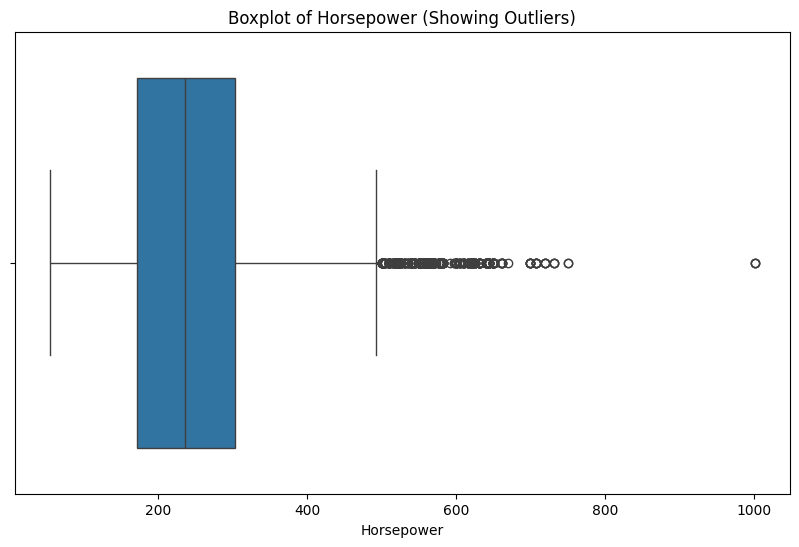

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Horsepower'])
plt.title('Boxplot of Horsepower (Showing Outliers)')
plt.xlabel('Horsepower')
plt.show()

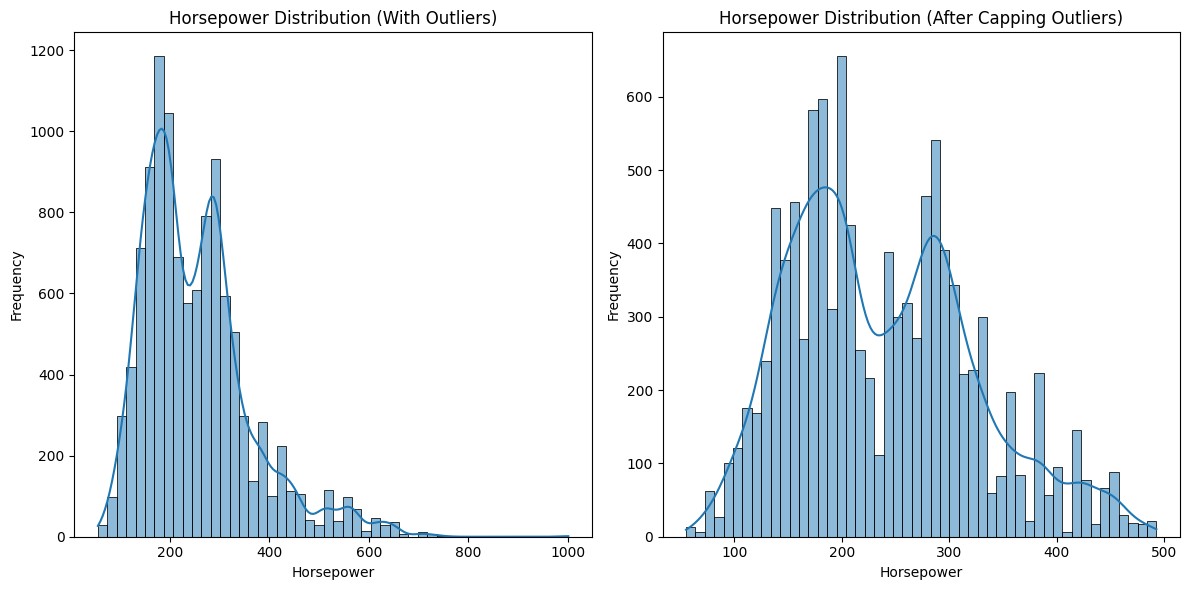

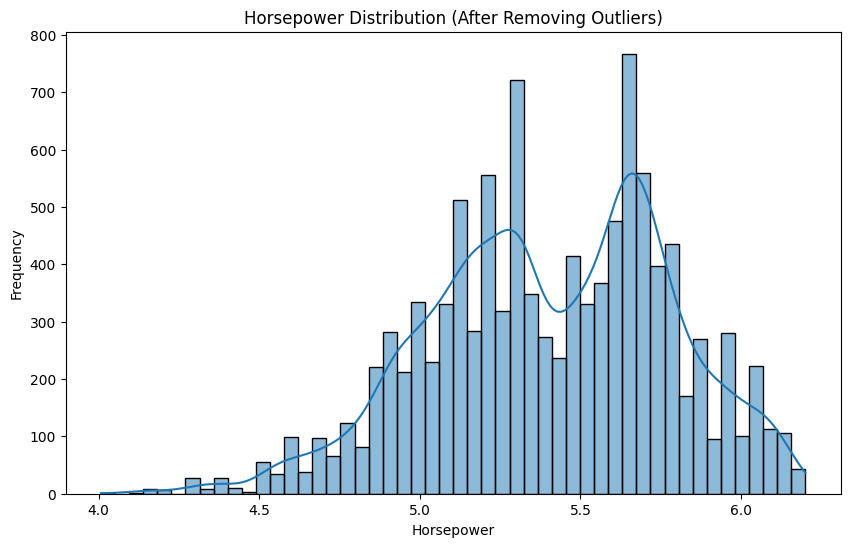

In [109]:
# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Horsepower'], bins=50, kde=True)
plt.title('Horsepower Distribution (With Outliers)')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

# After handling outliers (using capped data)
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Horsepower'], bins=50, kde=True)
plt.title('Horsepower Distribution (After Capping Outliers)')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log(df_cleaned['Horsepower']), bins=50, kde=True)
plt.title('Horsepower Distribution (After Removing Outliers)')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

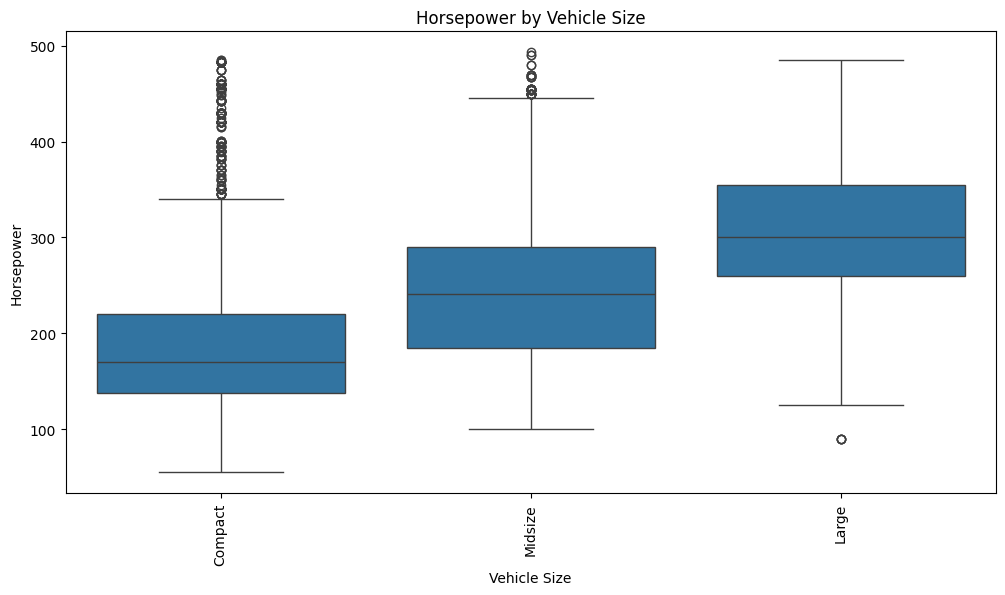

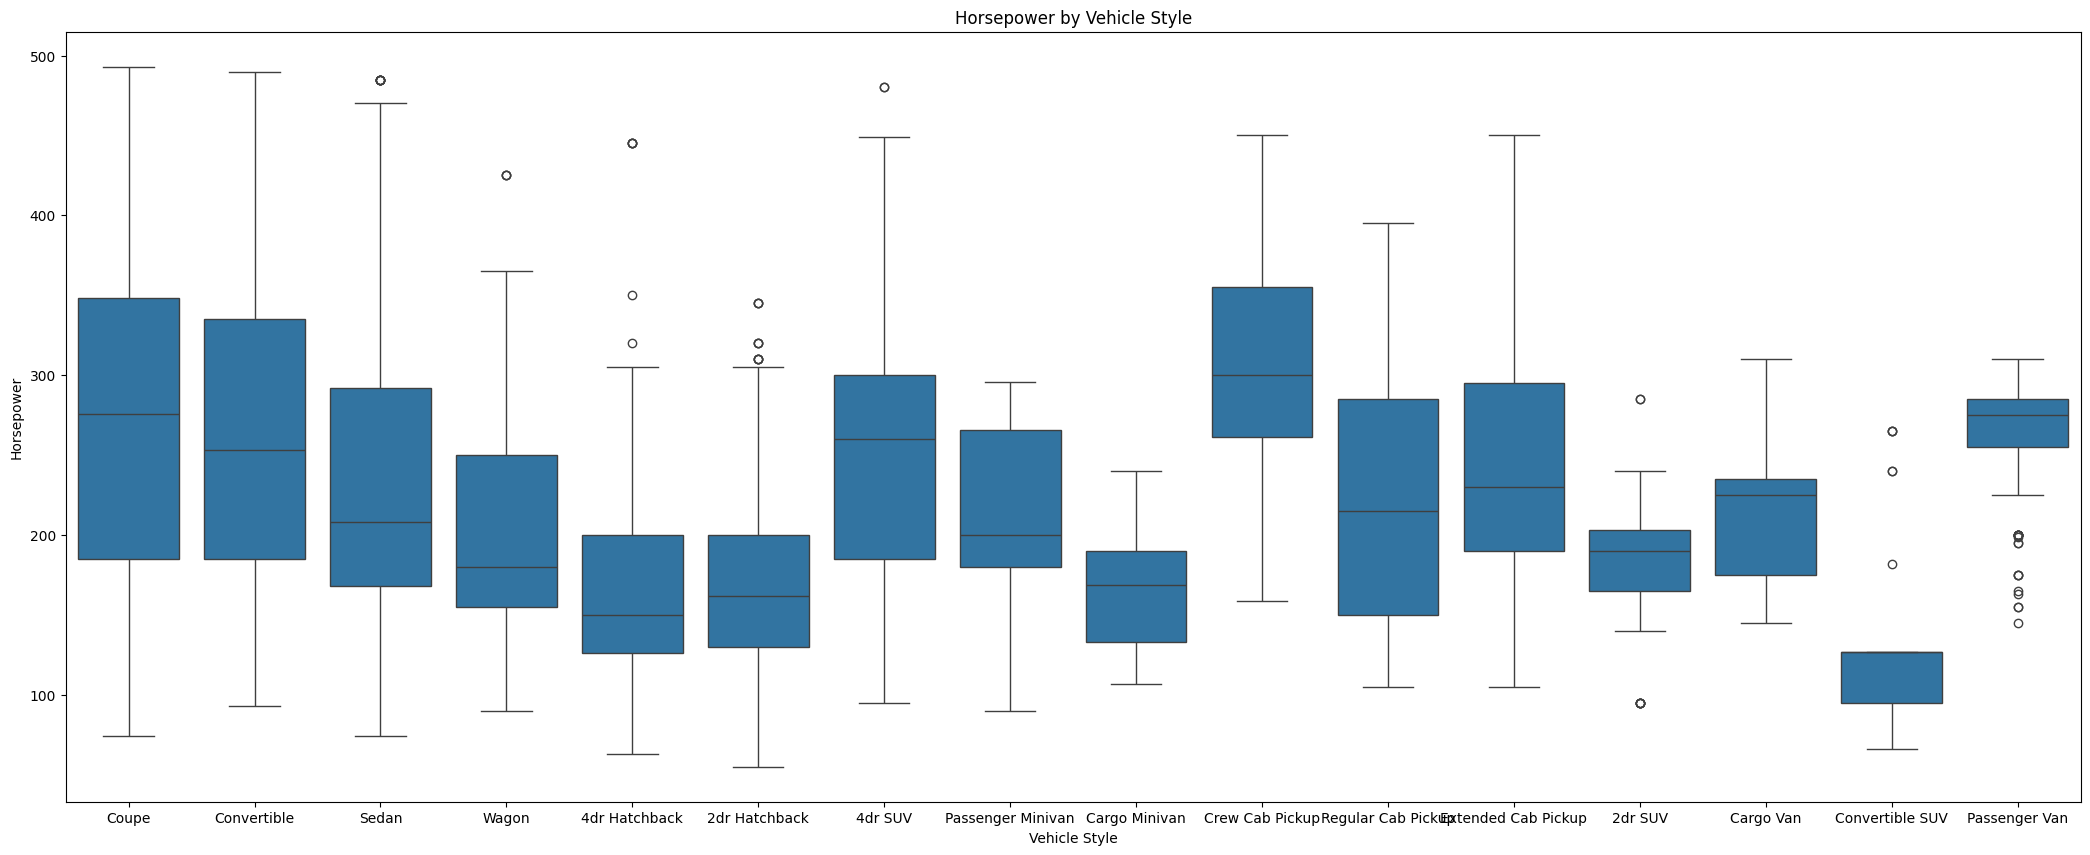

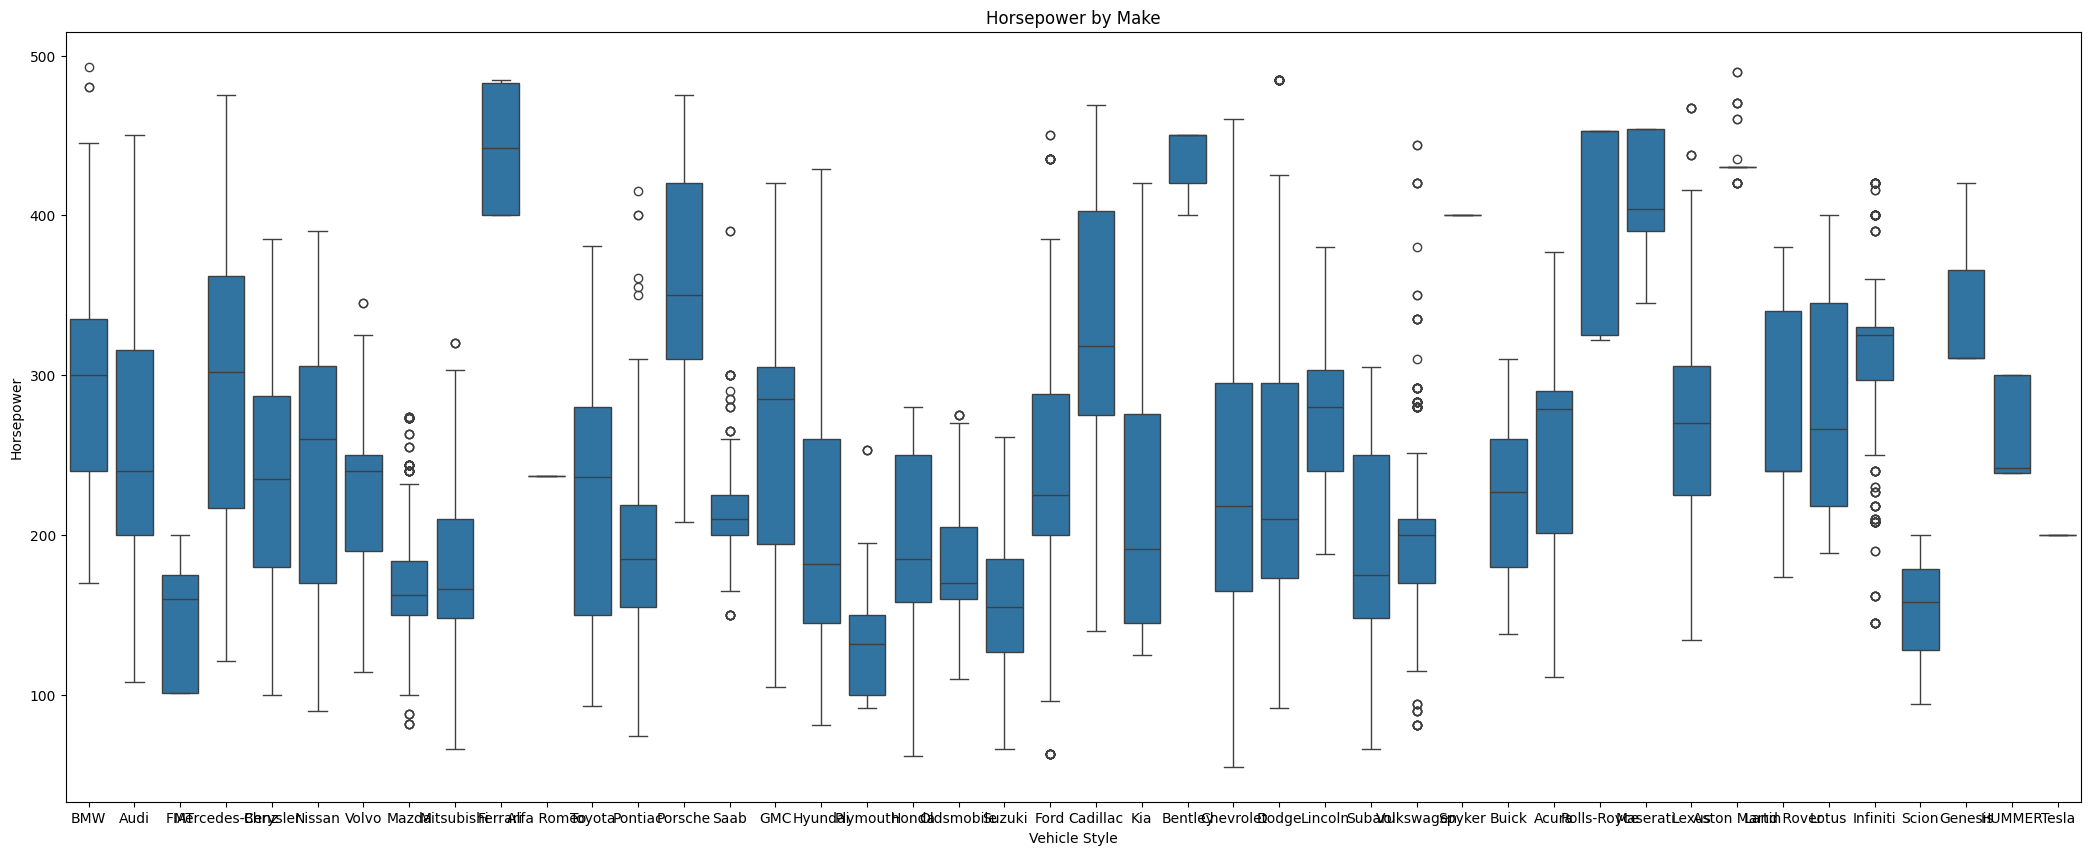

In [110]:
# Horsepower by Vehicle Size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Size', y='Horsepower', data=df_cleaned)
plt.title('Horsepower by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Horsepower')
plt.xticks(rotation=90)
plt.show()

# Horsepower by Vehicle Style
plt.figure(figsize=(26, 10))
sns.boxplot(x='Vehicle Style', y='Horsepower', data=df_cleaned)
plt.title('Horsepower by Vehicle Style')
plt.xlabel('Vehicle Style')
plt.ylabel('Horsepower')
plt.show()

# Horsepower by Make
plt.figure(figsize=(26, 10))
sns.boxplot(x='Make', y='Horsepower', data=df_cleaned)
plt.title('Horsepower by Make')
plt.xlabel('Vehicle Style')
plt.ylabel('Horsepower')
plt.show()

In [111]:
df['Number of Doors'].describe()

count    11199.000000
mean         3.454416
std          0.872804
min          2.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: Number of Doors, dtype: float64

In [112]:
df['Highway Miles Per Gallon'].describe()

count    11199.000000
mean        26.610590
std          8.977641
min         12.000000
25%         22.000000
50%         25.000000
75%         30.000000
max        354.000000
Name: Highway Miles Per Gallon, dtype: float64

In [113]:
df['City Miles Per Gallon'].describe()

count    11199.000000
mean        19.731851
std          9.177555
min          7.000000
25%         16.000000
50%         18.000000
75%         22.000000
max        137.000000
Name: City Miles Per Gallon, dtype: float64

### Detecting outliers in the 'City Miles Per Gallon' column

In [114]:
Q1 = df['City Miles Per Gallon'].quantile(0.25)
Q3 = df['City Miles Per Gallon'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['City Miles Per Gallon'] < lower_bound) | (df['City Miles Per Gallon'] > upper_bound)]
print(f"Number of outliers in 'City Miles Per Gallon': {len(outliers)}")

print("\nOutlier 'City Miles Per Gallon':")
print(outliers['City Miles Per Gallon'].describe())

#  Remove outliers
df_cleaned = df[(df['City Miles Per Gallon'] >= lower_bound) & (df['City Miles Per Gallon'] <= upper_bound)]

Number of outliers in 'City Miles Per Gallon': 305

Outlier 'City Miles Per Gallon':
count    305.000000
mean      56.252459
std       31.420302
min       32.000000
25%       36.000000
50%       42.000000
75%       54.000000
max      137.000000
Name: City Miles Per Gallon, dtype: float64


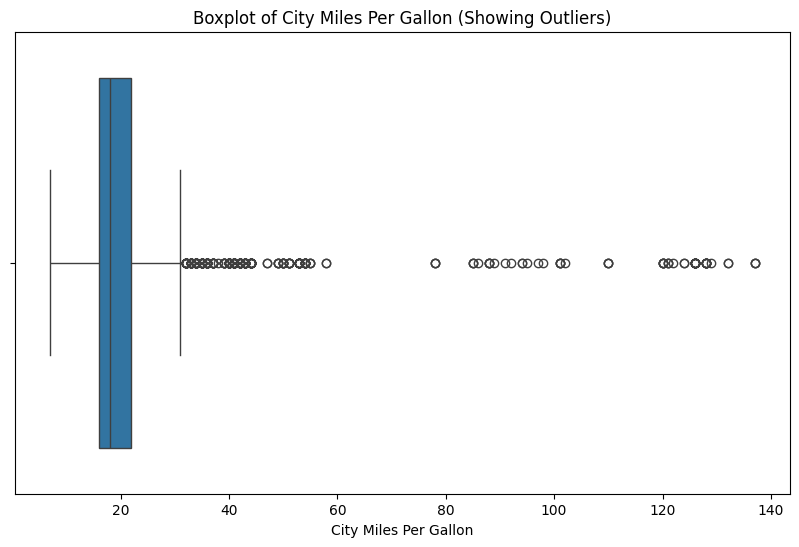

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['City Miles Per Gallon'])
plt.title('Boxplot of City Miles Per Gallon (Showing Outliers)')
plt.xlabel('City Miles Per Gallon')
plt.show()

In [116]:
df['Popularity'].describe()

count    11199.000000
mean      1558.483347
std       1445.668872
min          2.000000
25%        549.000000
50%       1385.000000
75%       2009.000000
max       5657.000000
Name: Popularity, dtype: float64

### Detecting outliers in the 'Popularity' column

In [117]:
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Popularity'] < lower_bound) | (df['Popularity'] > upper_bound)]
print(f"Number of outliers in 'Popularity': {len(outliers)}")

print("\nOutlier 'Popularity':")
print(outliers['Popularity'].describe())

#  Remove outliers
df_cleaned = df[(df['Popularity'] >= lower_bound) & (df['Popularity'] <= upper_bound)]

Number of outliers in 'Popularity': 825

Outlier 'Popularity':
count     825.0
mean     5657.0
std         0.0
min      5657.0
25%      5657.0
50%      5657.0
75%      5657.0
max      5657.0
Name: Popularity, dtype: float64


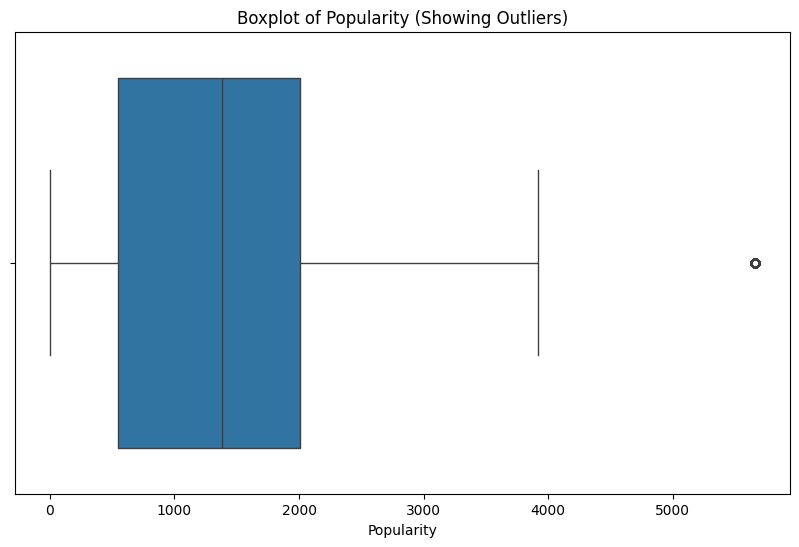

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Popularity'])
plt.title('Boxplot of Popularity (Showing Outliers)')
plt.xlabel('Popularity')
plt.show()

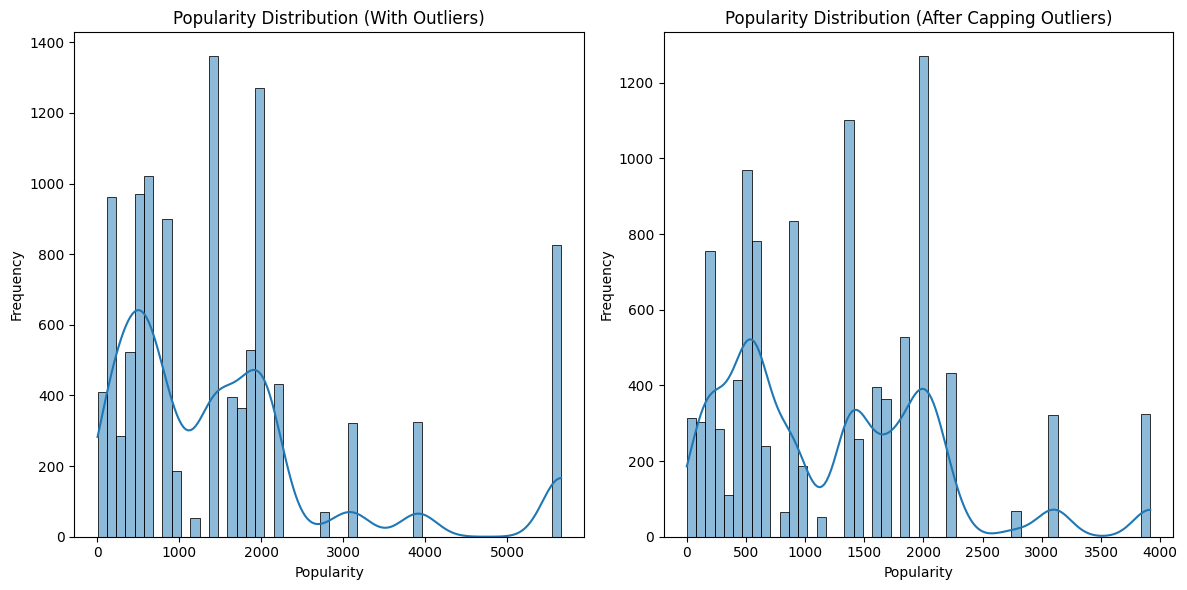

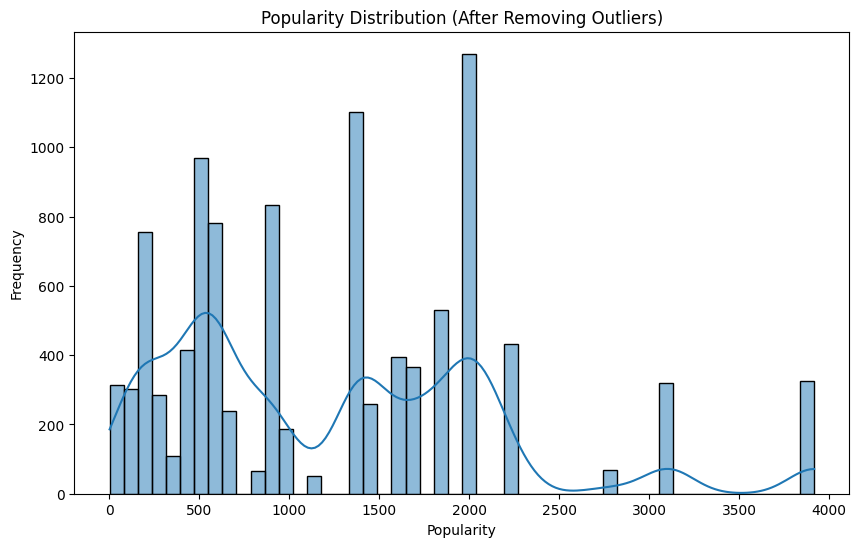

In [119]:
# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Popularity'], bins=50, kde=True)
plt.title('Popularity Distribution (With Outliers)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# After handling outliers (using capped data)
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Popularity'], bins=50, kde=True)
plt.title('Popularity Distribution (After Capping Outliers)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Popularity'], bins=50, kde=True)
plt.title('Popularity Distribution (After Removing Outliers)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

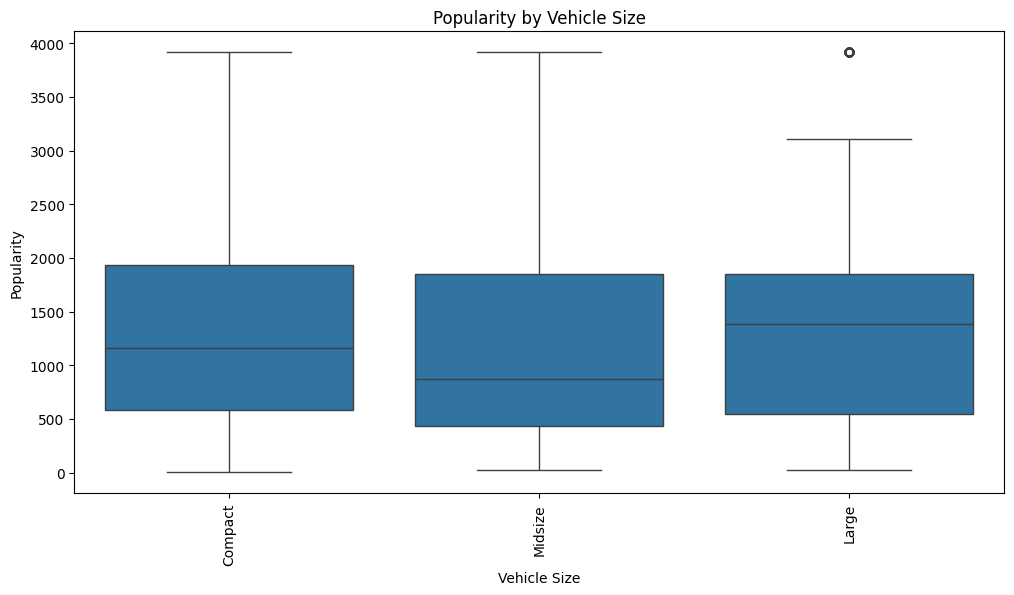

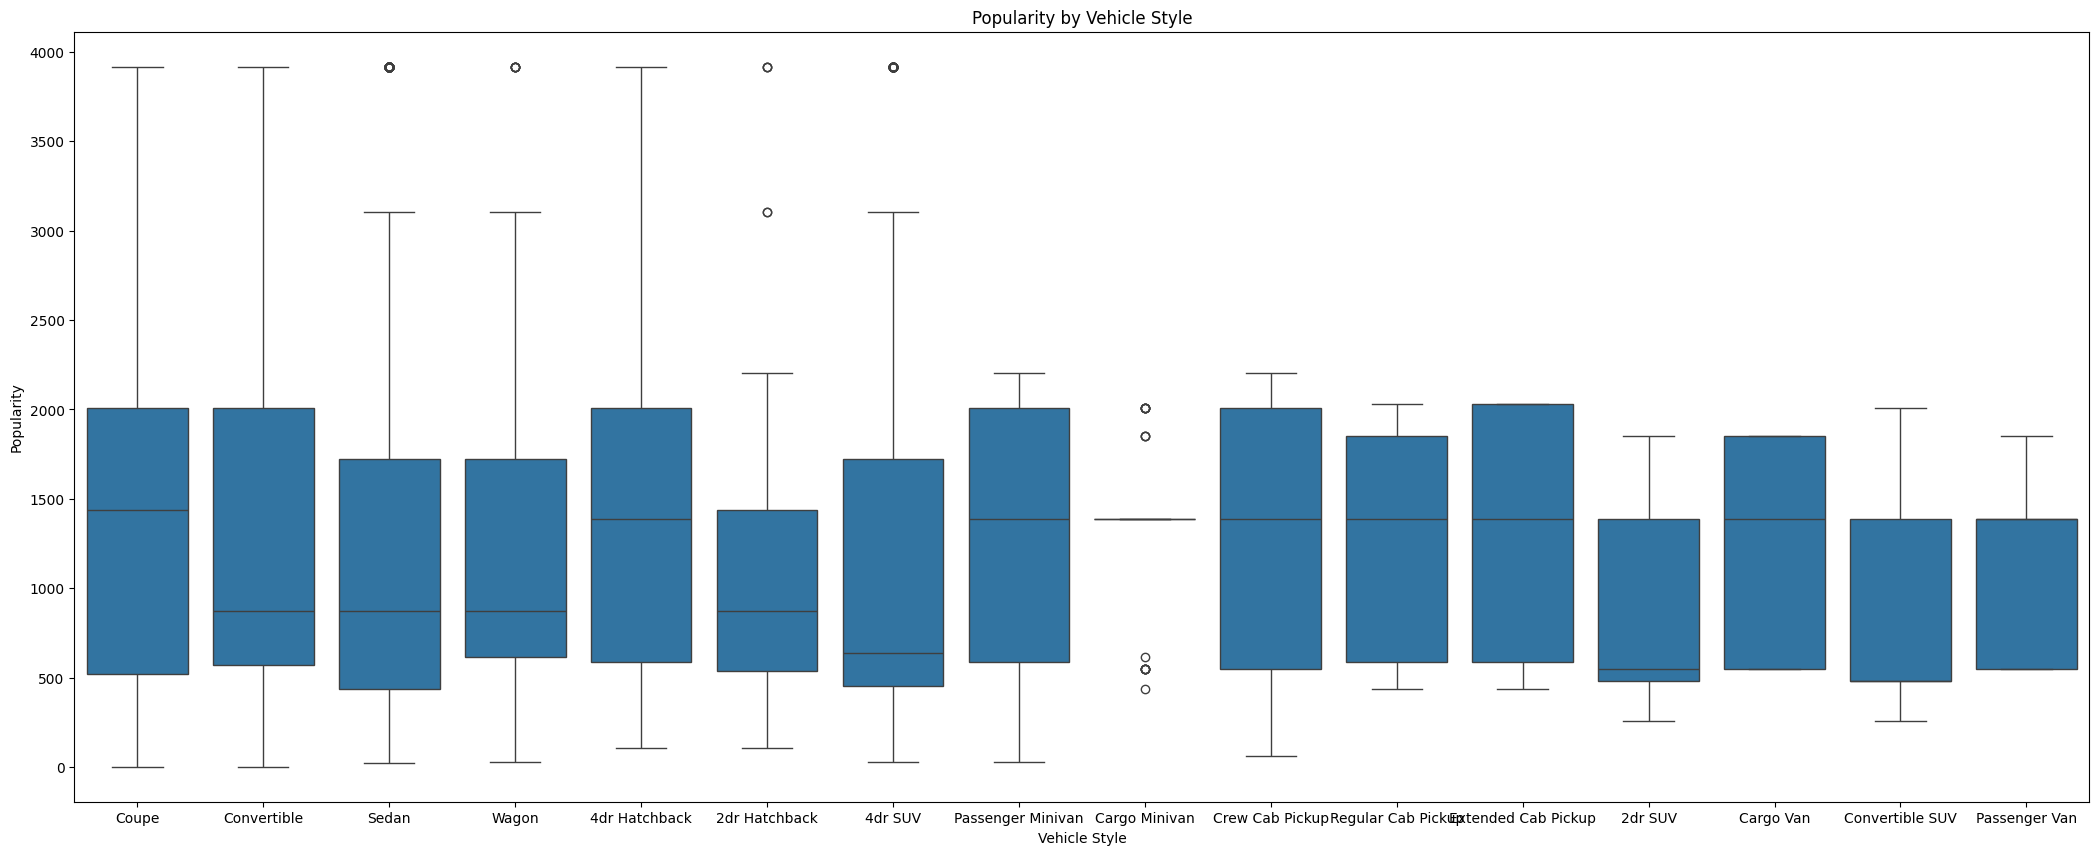

In [120]:
# Popularity by Vehicle Size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Size', y='Popularity', data=df_cleaned)
plt.title('Popularity by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

# Popularity by Vehicle Style
plt.figure(figsize=(26, 10))
sns.boxplot(x='Vehicle Style', y='Popularity', data=df_cleaned)
plt.title('Popularity by Vehicle Style')
plt.xlabel('Vehicle Style')
plt.ylabel('Popularity')
plt.show()

In [121]:
df['Retail Price'].describe()

count    1.119900e+04
mean     4.192593e+04
std      6.153505e+04
min      2.000000e+03
25%      2.159950e+04
50%      3.067500e+04
75%      4.303250e+04
max      2.065902e+06
Name: Retail Price, dtype: float64

### Detecting outliers in the Retail Price column

In [122]:
Q1 = df['Retail Price'].quantile(0.25)
Q3 = df['Retail Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Retail Price'] < lower_bound) | (df['Retail Price'] > upper_bound)]
print(f"Number of outliers in 'Retail Price': {len(outliers)}")

print("\nOutlier 'Retail Price':")
print(outliers['Retail Price'].describe())

#  Remove outliers
df_cleaned = df[(df['Retail Price'] >= lower_bound) & (df['Retail Price'] <= upper_bound)]

Number of outliers in 'Retail Price': 960

Outlier 'Retail Price':
count    9.600000e+02
mean     1.742869e+05
std      1.494505e+05
min      7.519500e+04
25%      9.136125e+04
50%      1.304000e+05
75%      2.132612e+05
max      2.065902e+06
Name: Retail Price, dtype: float64


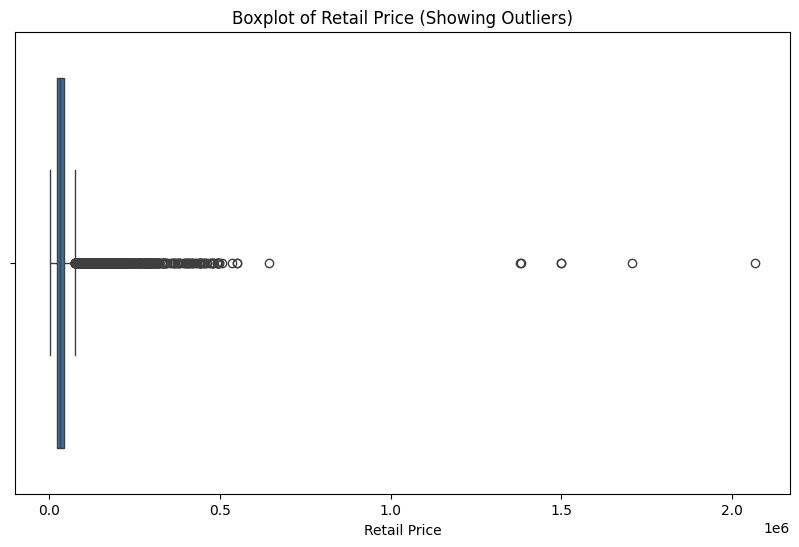

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Retail Price'])
plt.title('Boxplot of Retail Price (Showing Outliers)')
plt.xlabel('Retail Price')
plt.show()

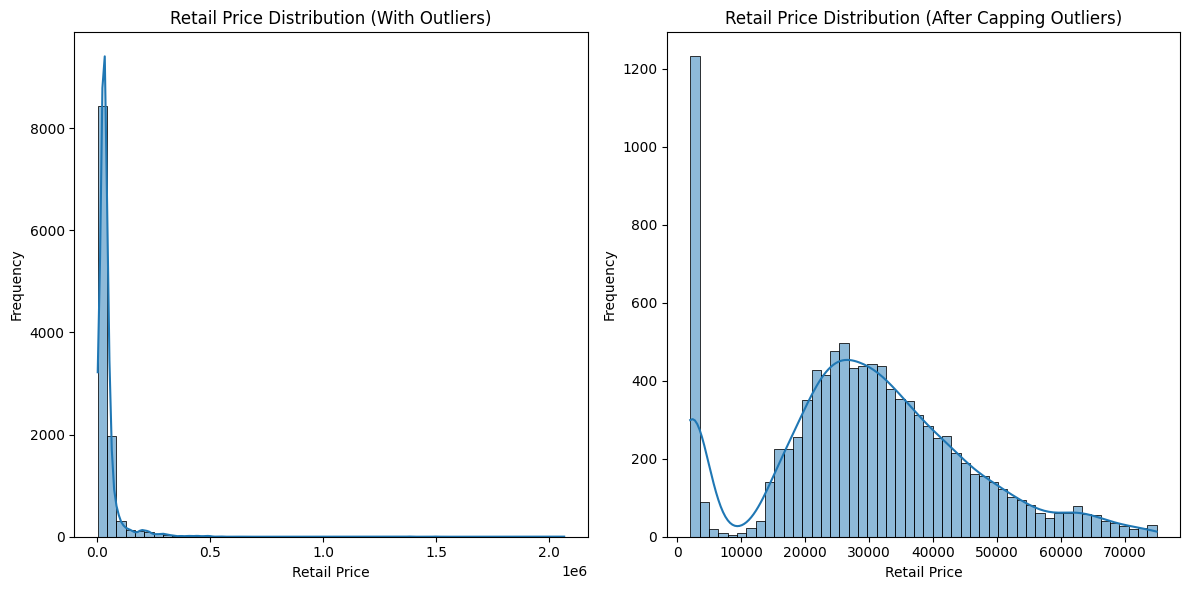

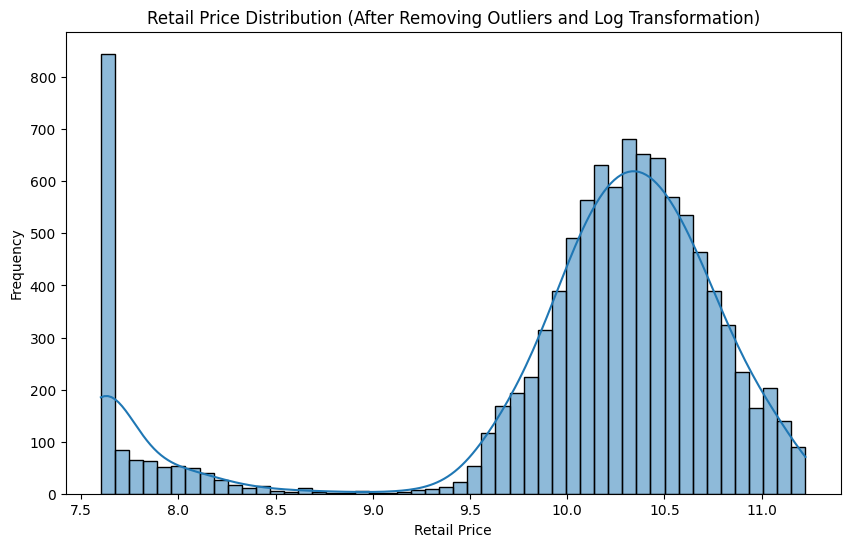

In [124]:
# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Retail Price'], bins=50, kde=True)
plt.title('Retail Price Distribution (With Outliers)')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')

# After handling outliers (using capped data)
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Retail Price'], bins=50, kde=True)
plt.title('Retail Price Distribution (After Capping Outliers)')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log(df_cleaned['Retail Price']), bins=50, kde=True)
plt.title('Retail Price Distribution (After Removing Outliers and Log Transformation)')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')
plt.show()

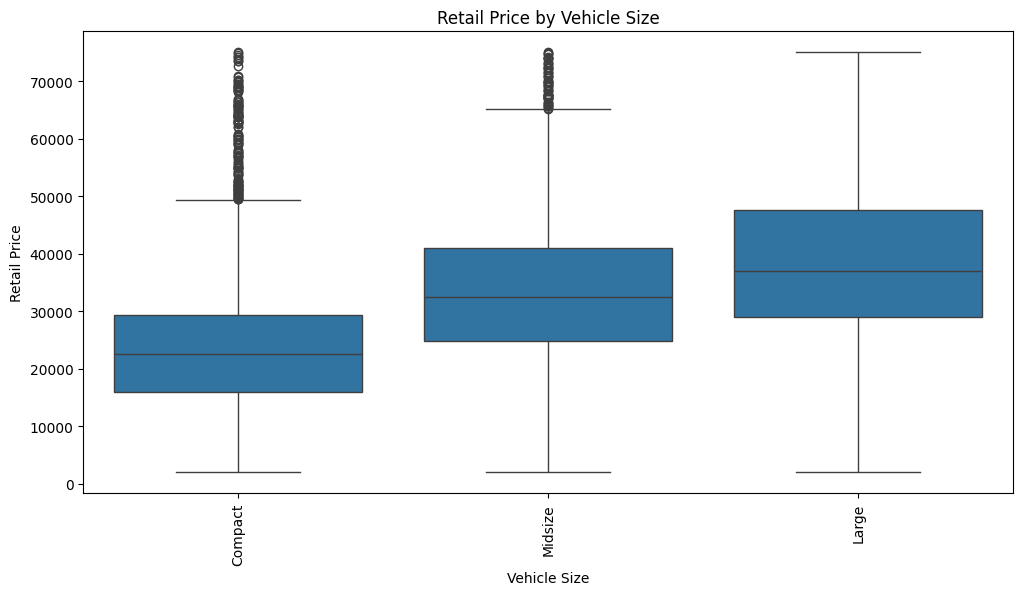

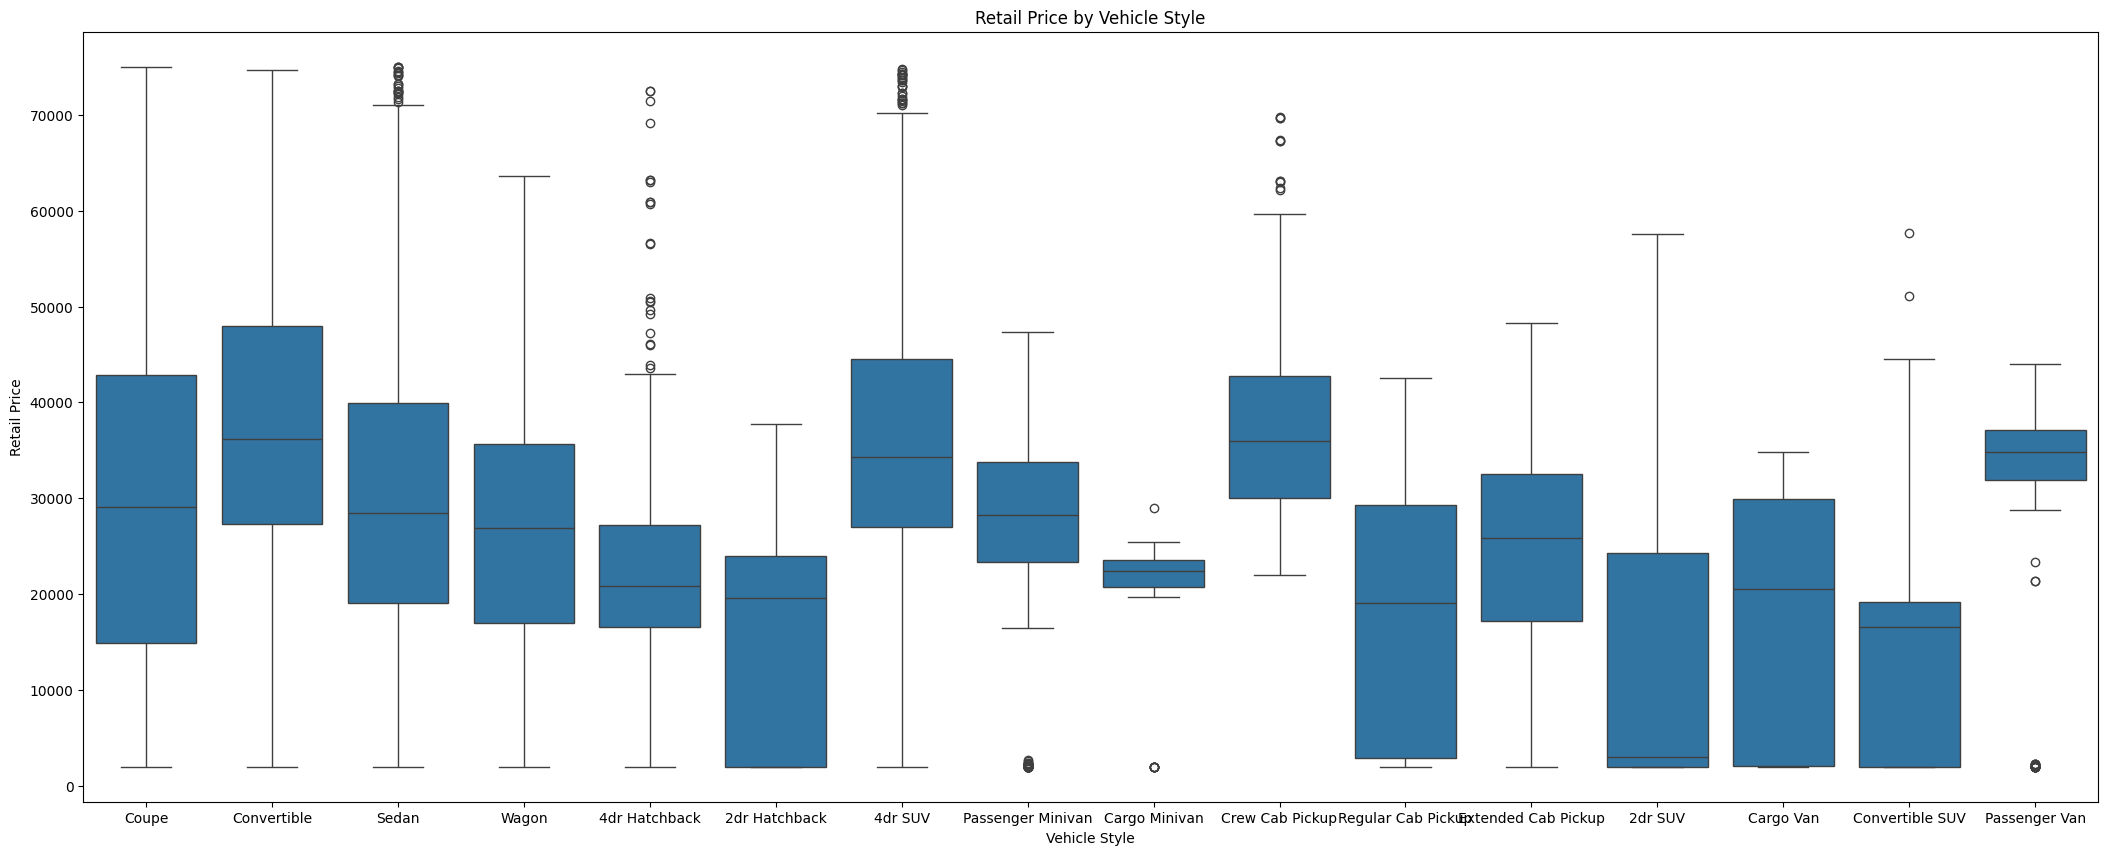

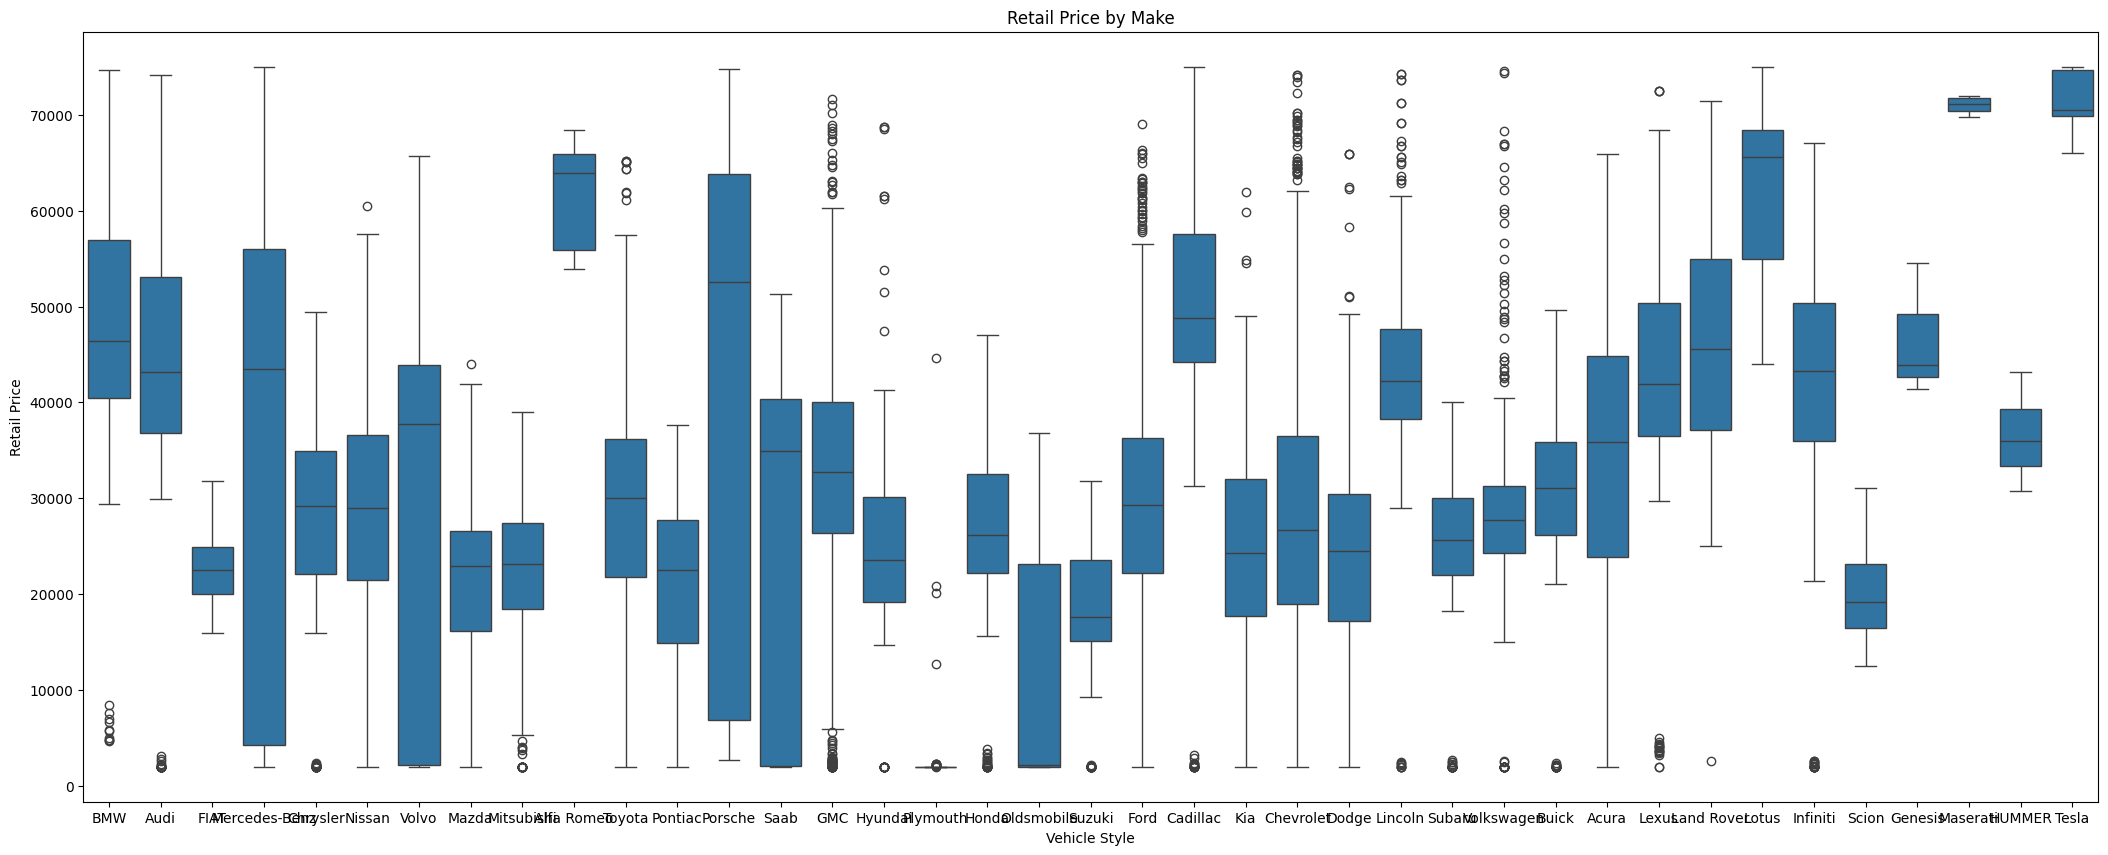

In [125]:
# Retail Price by Vehicle Size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Size', y='Retail Price', data=df_cleaned)
plt.title('Retail Price by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Retail Price')
plt.xticks(rotation=90)
plt.show()

# Retail Price by Vehicle Style
plt.figure(figsize=(26, 10))
sns.boxplot(x='Vehicle Style', y='Retail Price', data=df_cleaned)
plt.title('Retail Price by Vehicle Style')
plt.xlabel('Vehicle Style')
plt.ylabel('Retail Price')
plt.show()

# Retail Price by Make
plt.figure(figsize=(26, 10))
sns.boxplot(x='Make', y='Retail Price', data=df_cleaned)
plt.title('Retail Price by Make')
plt.xlabel('Vehicle Style')
plt.ylabel('Retail Price')
plt.show()

## Multivariate Analysis 

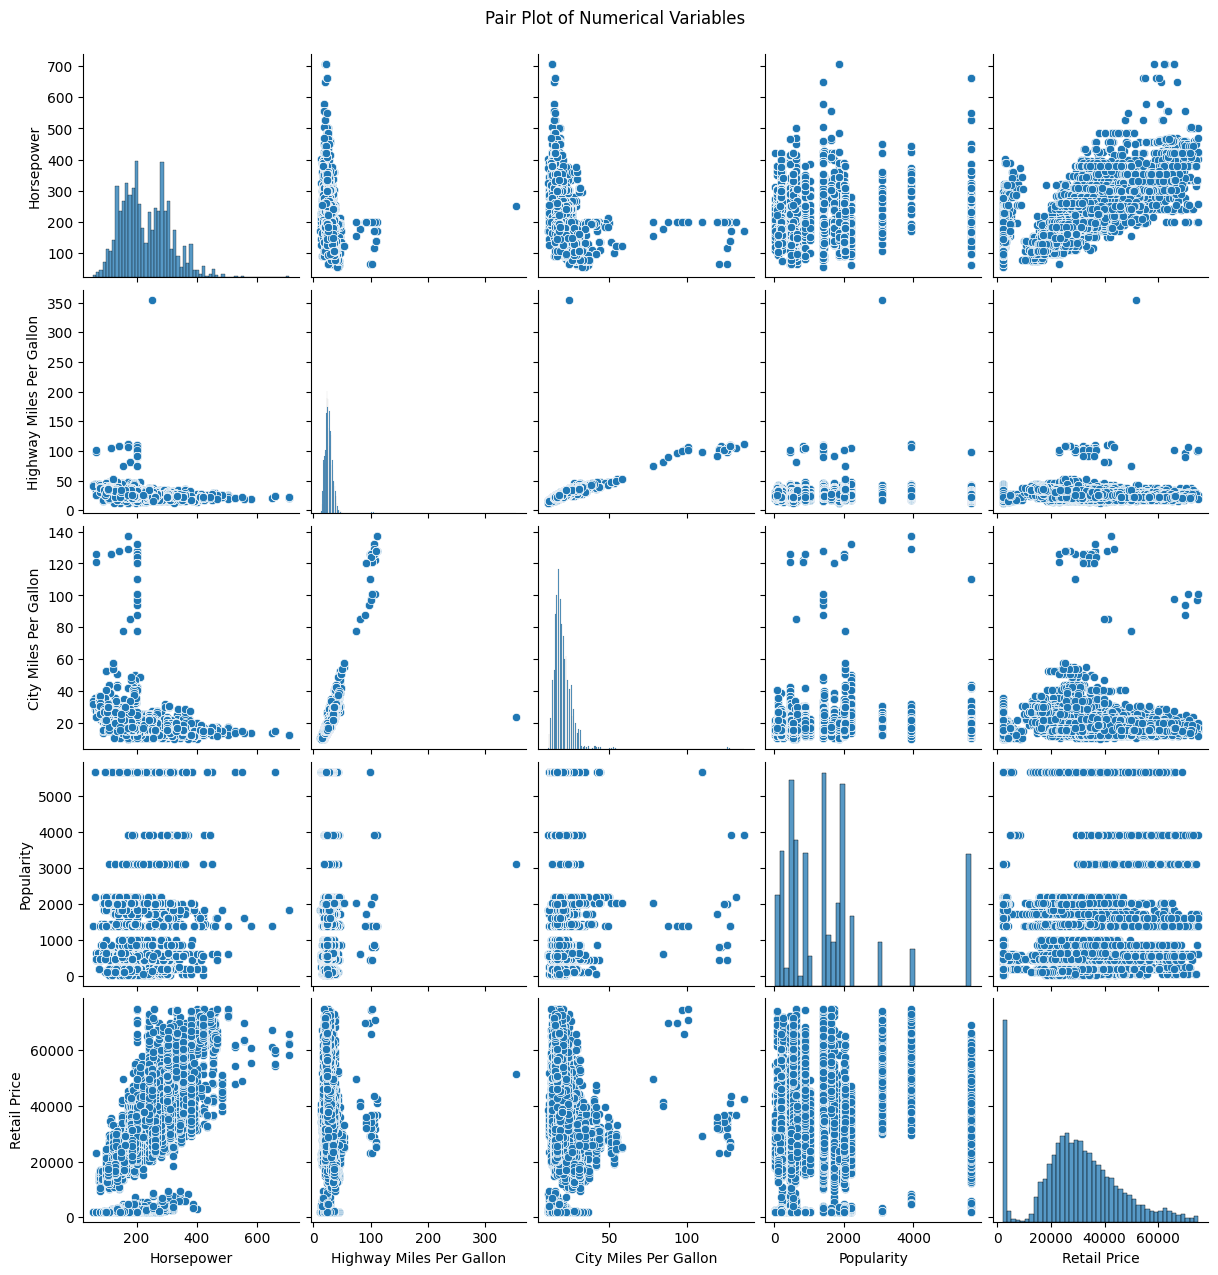

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pair plot
numerical_columns = ['Horsepower','Highway Miles Per Gallon', 'City Miles Per Gallon', 'Popularity', 'Retail Price']

# Create pair plot
sns.pairplot(df_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

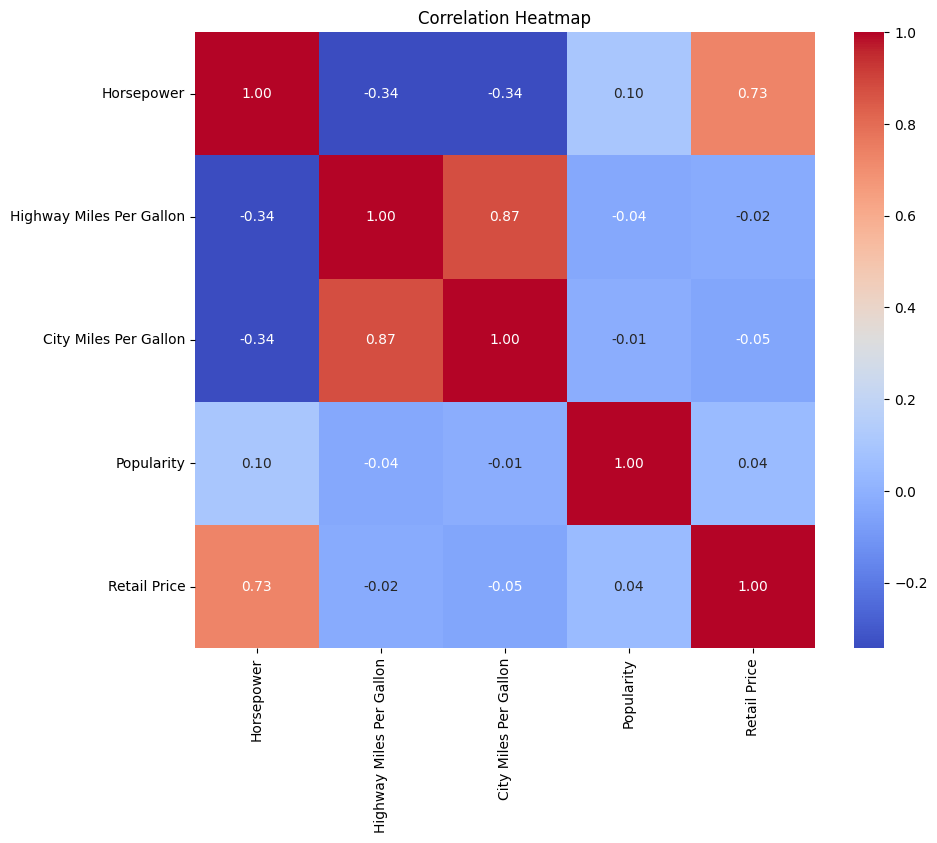

In [127]:
# Calculate correlation matrix
corr_matrix = df_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()